# =======================================================================================================
# Instructional START
# =======================================================================================================

In [1]:
import viz

In [474]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(29)

In [3]:
## Set the number of trials

n_trials = 10_000
n_rows = 10_000

## Roll three dice
n_dice = 3
n_cols = 3

# Use np's random choice
# Select from [1, 2, 3, 4, 5, 6]
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(n_rows, n_cols)

rolls

array([[6, 4, 5],
       [6, 3, 1],
       [1, 2, 2],
       ...,
       [6, 2, 1],
       [3, 4, 3],
       [4, 2, 4]])

In [4]:
sum_by_trials = rolls.sum(axis=1)

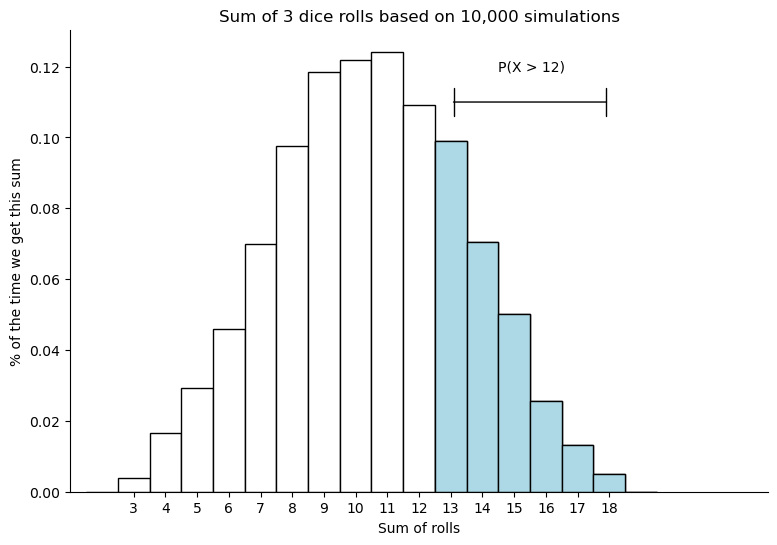

In [5]:
viz.simulation_example1(sum_by_trials)

In [6]:
# Check the condition > 12
wins = sum_by_trials > 12

In [7]:
wins

array([ True, False, False, ..., False, False, False])

In [10]:
# Set win array to integers (0 to 1)
# Find the mean to find the proportion of wins
win_rate = wins.astype(int).mean()

In [11]:
win_rate

0.2633

In [12]:
# Calculate expected winning
expected_winnings = win_rate * 15

# Account for the price of the game
cost = 5

# Profit
expected_profit = expected_winnings - cost

In [13]:
expected_profit

-1.0505000000000004

In [14]:
## Change the conditions of the game

In [15]:
### A win is greater than OR EQUAL to 12

In [16]:
wins = sum_by_trials >= 12
win_rate = wins.mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5860000000000003

In [25]:
p_nap = 0.3
ndays = ncols = 2
n_simulated_weekends = nrows = 10**5

In [26]:
data = np.random.random([nrows, ncols])

In [27]:
data

array([[0.67270175, 0.42499867],
       [0.78598114, 0.61832331],
       [0.26089944, 0.82947649],
       ...,
       [0.00583001, 0.19396241],
       [0.88510748, 0.79617694],
       [0.16619987, 0.87435159]])

In [28]:
naps = data < p_nap
naps

array([[False, False],
       [False, False],
       [ True, False],
       ...,
       [ True,  True],
       [False, False],
       [ True, False]])

In [29]:
naps.sum(axis=1)

array([0, 0, 1, ..., 2, 0, 1])

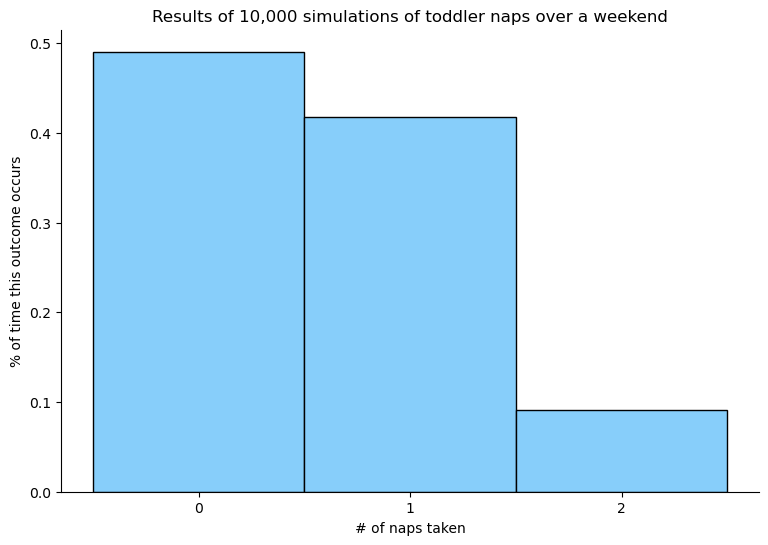

In [30]:
viz.simulation_example2(naps)

In [31]:
# Sum of naps = 1
# Sum of naps = 2
(naps.sum(axis=1) >= 1).mean()

0.50932

In [33]:
# Sum of naps = 0
(naps.sum(axis = 1) == 0).mean()

0.49068

In [ ]:
# Number of trials
n_simulations = nrows = 10**5

# Number of dice rolled
n_dice_rolled = ncols = 3

# Choose a value from 1 to 6
# Do this 300,000 times
# Arrange into sets of 3
rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

# 
(pd.DataFrame(rolls)
    .apply(lambda row: 3 in row.values, axis=1)
    .mean())

# =======================================================================================================
# Instructional END
# Instructional TO Exercises (8)
# Exercises (8) START
# =======================================================================================================

### 1. How likely is it that you roll doubles when rolling two dice?

In [518]:
dicedf = pd.DataFrame(np.random.randint(1, 7, size=[10000, 2]))

In [522]:
(dicedf.nunique(axis=1) == 1).mean()

0.1651

In [530]:
arr = np.random.randint(1, 7, size=[10000, 2])

In [531]:
np.apply_along_axis(lambda row: len(set(row)) == 1, axis=1, arr=arr).mean()

0.1731

In [37]:
ndice = ncols = 2
nrolls = nrows = 10**5
data = np.random.choice([1, 2, 3, 4, 5, 6], nrolls * ndice).reshape(nrolls, ndice)

In [38]:
data

array([[6, 2],
       [6, 2],
       [3, 4],
       ...,
       [2, 1],
       [6, 5],
       [4, 2]])

In [39]:
doubles = np.sum(data[:, 0] == data[:, 1])
prob_doubles = doubles / nrolls
prob_doubles

0.16679

### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [43]:
np.random.choice([0, 1], 8)

array([0, 0, 1, 0, 0, 0, 0, 0])

In [51]:
ncoins = ncols = 8
ncoin_trials = nrows = 10**5
data = np.random.choice([0, 1], ncoin_trails * ncoins).reshape(ncoin_trials, ncoins)

In [56]:
exact3 = (data.sum(axis=1) == 3).mean()
exact3

0.2183

In [57]:
morethan3 = (data.sum(axis=1) > 3).mean()
morethan3

0.63647

In [537]:
((np.random.randint(1, 3, size=[10000, 8]) == 1).sum(axis=1) == 3).mean()

0.2217

In [538]:
((np.random.randint(1, 3, size=[10000, 8]) == 1).sum(axis=1) > 3).mean()

0.6407

### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [61]:
datascience = 0.25
billboards = ncols = 2
bill_trials = nrows = 10**5
data = np.random.random([bill_trials, billboards])
isdata = data < datascience
isdata

array([[False, False],
       [False,  True],
       [ True, False],
       ...,
       [False,  True],
       [False, False],
       [False, False]])

In [62]:
(isdata.sum(axis=1) == 2).mean()

0.06282

In [545]:
((np.random.random([10000, 2]) <= 1/4).sum(axis=1) == 2).mean()

0.0614

### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

In [93]:
popmean = 3
popstd = 1.5
poptrials = np.random.normal(popmean * 5, popstd * 5, size=100)
haspop = (poptrials - 17) > 0
haspop.mean()

0.3

In [576]:
(np.random.normal(3, 1.5, size=[10000, 5]).sum(axis=1) < 17).mean()

0.7208

In [595]:
(np.random.normal(3, 1.5, size=[10000, 5]).round().sum(axis=1) < 17).mean()

0.6712

In [592]:
(np.maximum(np.random.normal(3, 1.5, size=[10000, 5]).round(), 0).sum(axis=1) < 17).mean()

0.6602

In [596]:
np.maximum?

### 5. Compare Heights

##### 5a. Men have an average height of 178 cm and standard deviation of 8cm.

In [131]:
menmean = 178
menstd = 8

##### 5b. Women have a mean of 170, sd = 6cm.

In [132]:
womenmean = 170
womenstd=6

##### 5c. Since you have means and standard deviations, you can use np.random.normal to generate observations.

In [133]:
mentrial = np.random.normal(menmean, menstd, size=1000)
womentrial = np.random.normal(womenmean, womenstd, size=1000)

##### 5d. If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [134]:
heighttrials = np.array([mentrial, womentrial])

In [141]:
heighttrials

array([[185.93402292, 187.16879817, 170.61141024, ..., 173.61248632,
        184.66164676, 181.82955632],
       [160.40716432, 174.18180994, 168.16603477, ..., 170.22387772,
        165.0290935 , 165.67423247]])

In [222]:
hgtTriBool = heighttrials[0, :] < heighttrials[1, :]

In [223]:
hgtTriBool.mean()

0.222

In [598]:
(mentrial < womentrial).mean()

0.222

### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. 

##### 6a. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

In [184]:
errorprob = 1/250

In [185]:
((np.random.random([10000, 50]) > errorprob).sum(axis=1) == 50).mean()

0.8163

In [186]:
((np.random.random([10000, 100]) > errorprob).sum(axis=1) == 100).mean()

0.6691

##### 6b. What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [187]:
((np.random.random([10000, 150]) > errorprob).sum(axis=1) < 150).mean()

0.4496

##### 6c. How likely is it that 450 students all download anaconda without an issue?

In [188]:
((np.random.random([10000, 450]) > errorprob).sum(axis=1) == 450).mean()

0.1613

##### 7a. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [189]:
truckchance = .70

In [194]:
((np.random.random([10000, 3]) > .70).sum(axis=1) == 3).mean()

0.0262

##### 7b. How likely is it that a food truck will show up sometime this week?

In [197]:
((np.random.random([10000, 7]) <= .70).sum(axis=1) > 1).mean()

0.9968

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [371]:
len(set(np.random.randint(1, 365, 23)))

21

In [372]:
arr = np.random.randint(1, 366, size=[10000, 23])

In [373]:
(np.apply_along_axis(lambda row: len(np.unique(row)) != 23, axis=1, arr=arr)).mean()

0.5103

In [374]:
arr = np.random.randint(1, 366, size=[10000, 20])

In [375]:
(np.apply_along_axis(lambda row: len(np.unique(row)) != 20, axis=1, arr=arr)).mean()

0.4076

In [376]:
arr = np.random.randint(1, 366, size=[10000, 40])

In [377]:
(np.apply_along_axis(lambda row: len(np.unique(row)) != 40, axis=1, arr=arr)).mean()

0.8914

In [602]:
np.apply_along_axis(lambda row: len(np.unique(row)) != 10, axis=1, arr=np.random.randint(1, 366, size=[10000, 10])).mean()

0.1205

# =======================================================================================================
# Exercises (8) END
# Exercises (8) TO Exercises Bonus (2)
# Exercises Bonus (2) START
# =======================================================================================================

##### "Mage Duel": https://gist.github.com/ryanorsinger/2996446f02c1bf30fcb3f8fdb88bd51d

Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.

Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means rolling four six-sided dice and summing the result.

##### Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.

The 4d6 mage

##### Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?

In [421]:
(np.random.randint(1, 5, size=[10, 6]).sum(axis=1) > np.random.randint(1, 7, size=[10, 4]).sum(axis=1)).mean()

0.7

In [422]:
(np.random.randint(1, 5, size=[10, 6]).sum(axis=1) > np.random.randint(1, 7, size=[10, 4]).sum(axis=1)).mean()

0.4

##### Do the results change much at 100 duels?

In [426]:
(np.random.randint(1, 5, size=[100, 6]).sum(axis=1) > np.random.randint(1, 7, size=[100, 4]).sum(axis=1)).mean()

0.53

##### Now, simulate 10,000 mage duels. Is there a clear winner?

In [435]:
(np.random.randint(1, 5, size=[10000, 6]).sum(axis=1) > np.random.randint(1, 7, size=[10000, 4]).sum(axis=1)).mean()

0.5561

##### "Chuck a Luck": https://gist.github.com/ryanorsinger/eac1d7b7e978f90b8390bdc056312123

##### What are your chances of getting an outcome payout of 2?(where we earned 3 on the 1 ante)

In [448]:
((np.random.randint(1, 7, size=[100, 3]) == 1).sum(axis=1) == 3).mean()

0.01

Based on 100 plays, there's a 1% chance

##### What are your chances of getting an payout of 1?

In [452]:
((np.random.randint(1, 7, size=[100, 3]) == 1).sum(axis=1) == 2).mean()

0.08

Based on 100 plays, there's a 8% chance

##### What are your chances of getting a payout of 0 where you ante 1 and win 1?

In [456]:
((np.random.randint(1, 7, size=[100, 3]) == 1).sum(axis=1) == 1).mean()

0.34

Based on 100 plays, there's a 34% chance

##### What are your chances of getting a payout of -1 where you ante up, but don't win anything?

In [467]:
((np.random.randint(1, 7, size=[100, 3]) == 1).sum(axis=1) == 0).mean()

0.59

Based on 100 plays, there's a 59% chance

##### What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

In [469]:
-0.59 + 0 + 0.08 + 0.02

-0.49

Expected loss of $0.49 per game played

##### Chart out a histogram of all the outcomes of those 1,000,000 games

In [472]:
df = pd.DataFrame(np.random.randint(1, 7, size=[1000000, 3]))

In [473]:
df

,0,1,2
0,2,6,4
1,2,5,5
2,3,2,2
3,6,2,3
4,4,4,2
...,...,...,...
999995,6,2,3
999996,2,5,3
999997,5,6,6
999998,5,1,5


In [483]:
sum_df = (np.random.randint(1, 7, size=[1000000, 3]) == 1).sum(axis=1)

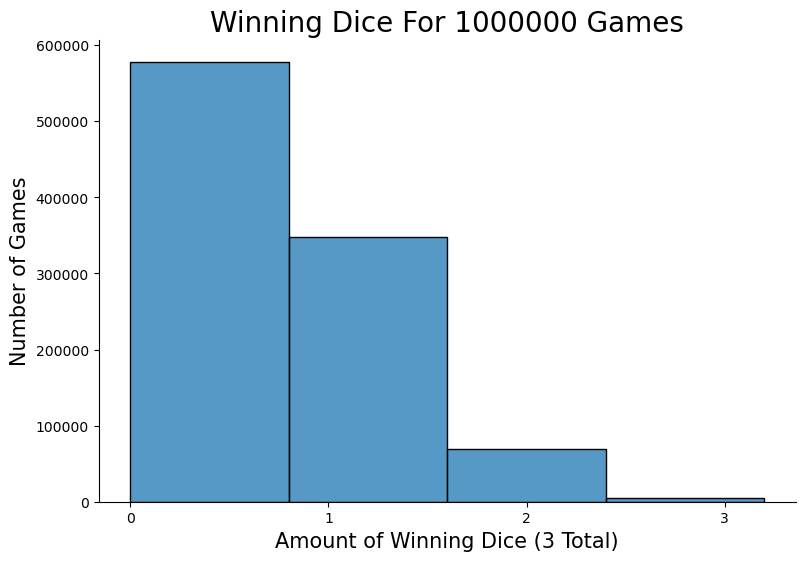

In [498]:
sns.histplot(data=sum_df, binwidth=0.8)
plt.title('Winning Dice For 1000000 Games', fontsize = 20)
plt.xlabel('Amount of Winning Dice (3 Total)', fontsize = 15)
plt.xticks(range(4))
plt.ylabel('Number of Games', fontsize = 15)
plt.show()

##### Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

Hell naw, you guaranteed to lose some bills dawg!

##### If you play 1,000,000 games in a row, what are your winnings/losses?

In [501]:
gamesplayed = (np.random.randint(1, 7, size=[1000000, 3]) == 1).sum(axis=1)

In [513]:
print(f'${((gamesplayed == 0).sum() * -1) + ((gamesplayed == 1).sum() * 0) + ((gamesplayed == 2).sum() * 1) + ((gamesplayed == 3).sum() * 2)}')

$-500728


You gettin' played bruv!

# =======================================================================================================
# Exercises Bonus (2) END
# =======================================================================================================